In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
from sklearn.feature_selection import SelectKBest,chi2,RFE,f_classif

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
filename = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names)

# data = pd.read_csv('diabetes.csv')
print(data.shape)
pd.set_option('precision', 2)

(768, 9)


In [4]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [12]:
test=SelectKBest(chi2,k=5)
X_new=test.fit_transform(X,Y)
X_new

array([[  6. , 148. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. , 112. ,  26.2,  30. ],
       [  1. , 126. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,   0. ,  30.4,  23. ]])

In [15]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [34]:
df=pd.DataFrame(test.scores_,index=[X.columns],columns=['KBest-Scores'])
df.sort_values(by = 'KBest-Scores', ascending=False).head(5)


,KBest-Scores
age,8.21
plas,7.09
preg,6.56
pedi,2.76
test,2.57


In [44]:
## RFE

lr=LogisticRegression()
rfe=RFE(lr,5)
test=rfe.fit(X,Y)


C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
test

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [49]:
X.columns[(test.ranking_==1)]

Index(['preg', 'plas', 'pres', 'mass', 'pedi'], dtype='object')

In [50]:
## Extra Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.09927537 0.22450974 0.09777128 0.07606456 0.07758639 0.14740722
 0.12525296 0.15213249]


C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
sc= pd.DataFrame(model.feature_importances_, index=X.columns)
sc

,0
preg,0.10
plas,0.22
pres,0.10
skin,0.08
test,0.08
mass,0.15
pedi,0.13
age,0.15


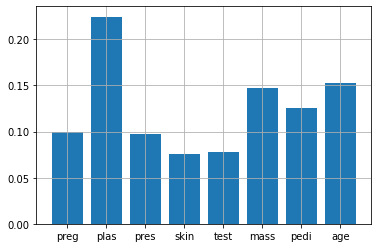

In [64]:
plt.bar(X.columns,model.feature_importances_)
plt.grid(True)

In [6]:
## Univariate Feature Selection

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, random_state=5)

In [62]:
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
# plt.bar(X_indices, scores, width=.2,
#         label=r'Univariate score ($-Log(p_{value})$)')

In [63]:
clf=Pipeline([('minmax',MinMaxScaler()),('lr',LogisticRegression())])
clf.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [64]:
print('The accuracy without applying Feature Selection is : {} '.format(clf.score(X_test,y_test)))

The accuracy without applying Feature Selection is : 0.7291666666666666 


In [58]:
# sum_weights=np.abs(clf[-1].coef_).sum(axis=0)
# sum_weights/=sum_weights.sum()
# sum_weights

array([0.12095979, 0.31813182, 0.10635961, 0.00545431, 0.03509807,
       0.17210646, 0.13030343, 0.11158651])

In [65]:
clf_selected=Pipeline([('select_k_best',SelectKBest(f_classif,k=5)),('minmax',MinMaxScaler()),('lr',LogisticRegression())])
clf_selected.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('select_k_best',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x0000022C035A3268>)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [66]:
print('The accuracy after applying Feature Selection is : {} '.format(clf_selected.score(X_test,y_test)))

The accuracy without applying Feature Selection is : 0.75 


In [73]:
clf_=Pipeline([('minmax',MinMaxScaler()),('select_k_best',SelectKBest(f_classif,k=5)),('lr',LogisticRegression())])
clf_.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('select_k_best',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x0000022C035A3268>)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [74]:
print('The accuracy with first MinMax is : {} '.format(clf_.score(X_test,y_test)))

The accuracy with first MinMax is : 0.75 


In [75]:
clf_=Pipeline([('select_k_best',SelectKBest(f_classif,k=5)),('lr',LogisticRegression())])
clf_.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('select_k_best',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x0000022C035A3268>)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [76]:
print('The accuracy with without MinMax is : {} '.format(clf_.score(X_test,y_test)))

The accuracy with without MinMax is : 0.7864583333333334 


As we can s

- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py